# Step 1 - Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms


# Step 2 : Transforms


In [ ]:
train_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))])
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))])


# Step 3 Get the Data

In [ ]:
train = datasets.MNIST('./data',download = True,transform=train_transforms)
test =  datasets.MNIST('./data',download = True,transform=test_transforms)

Step 4: train loader/test loader

In [ ]:
# check if cuda is available

cuda = torch.cuda.is_available()
print('cuda is available :',cuda)


kwargs = dict(shuffle=True,batch_size=128,num_workers=4,pin_memory=True) if cuda else dict(shuffle=True,batch_size=64 )

train_loader = torch.utils.data.DataLoader(train,**kwargs)
test_loader = torch.utils.data.DataLoader(test,**kwargs)


cuda is available : True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics
## to display any data first it needs to converted to numpy as matplotlib works on numpy arrays,lists and Pandas dataframes




In [ ]:
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[TEST]')
print(' - Numpy Shape:', test.test_data.cpu().numpy().shape)

print('[Train]')
print(type(train_data))
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[TEST]
 - Numpy Shape: (60000, 28, 28)
[Train]
<class 'torch.Tensor'>
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


 - var: tensor(1.0001)


In [ ]:
print(type(train_loader))
dataiter = iter(train_loader)
print(type(dataiter))
images,labels = next(dataiter)
print(type(images))
print(type(labels))
print(images.shape)
print(images[0].squeeze().shape)


<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([28, 28])


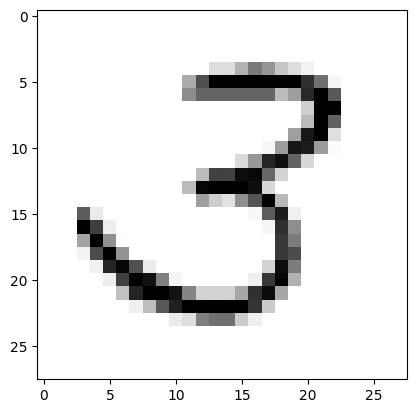

In [ ]:
import matplotlib.pyplot as plt



plt.imshow(images[0].squeeze(),cmap='gray_r')

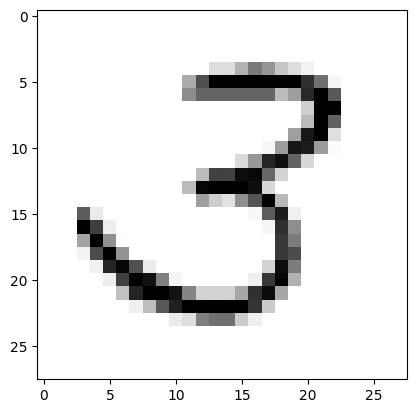

In [ ]:
import matplotlib.pyplot as plt



plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

# plot 60 images in the train loader

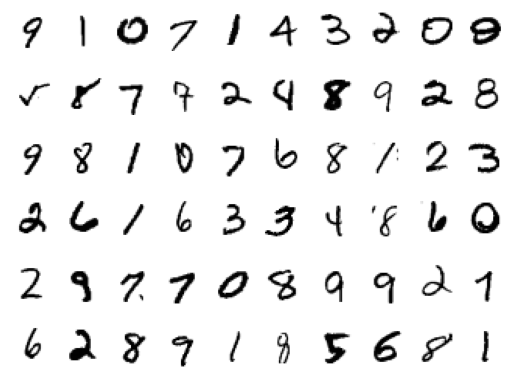

In [ ]:
#plot 64 images

figure = plt.figure()


num_of_images = 60
for index in range(1, num_of_images + 1):
  plt.subplot(6, 10, index)
  plt.axis('off')
  plt.imshow(images[index].squeeze(),cmap = 'gray_r')

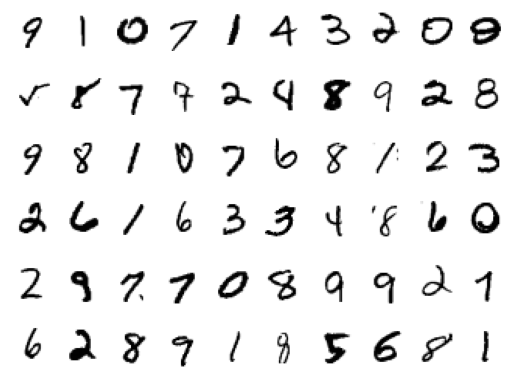

In [ ]:
#plot 64 images

figure = plt.figure()


num_of_images = 60
for index in range(1, num_of_images + 1):
  plt.subplot(6, 10, index)
  plt.axis('off')
  plt.imshow(images[index].numpy().squeeze(),cmap = 'gray_r')

#create a Model

In [ ]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1,32,3,padding=1)
    self.conv2 = nn.Conv2d(32,64,3,padding=1)
    self.pool1 = nn.MaxPool2d(2,2)
    self.conv3 = nn.Conv2d(64,128,3,padding=1)
    self.conv4 = nn.Conv2d(128,256,3,padding=1)
    self.pool2 = nn.MaxPool2d(2,2)
    self.conv5 = nn.Conv2d(256,512,3)
    self.conv6 = nn.Conv2d(512,1024,3)
    self.conv7 = nn.Conv2d(1024,10,3)


  def forward(self,x):
    x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
    x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
    x = F.relu(self.conv6(F.relu(self.conv5(x))))
    # x = F.relu(self.conv7(x)) # we dont add RELU on last layer
    x = self.conv7(x)
    x = x.view(-1, 10) #1x1x10> 10
    return F.log_softmax(x, dim=-1)

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
--------------------------------

# Training and Testing

---



In [ ]:
from tqdm import tqdm
train_losses = []
train_acc = []
test_losses =[]
test_acc = []

def train(model,device,train_loader,optimizer,epoch):
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  # model in train mode
  # backpropogation
  # update the weights using optim and scheduler
  # batch wise and epoch wise
  # accumlate train loss
  for batch_ix,(data,target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)#move the data to respective device
    # init
    optimizer.zero_grad() # make all gradients zero
    model.train() #  set the model in train mode
    output = model(data)   # predict
    loss = F.nll_loss(output,target) # calculate loss
    train_losses.append(loss) #
    loss.backward() # Backpropogation
    optimizer.step() # adjust the weights based on the gradients from backpropogation

    pred = output.argmax(dim=1,keepdim=True) # from logits take the highest
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed +=len(data)
    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_ix} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100 * correct/processed)

def test(model,test_loader,device):
  model.eval()
  test_loss = 0
  correct = 0
  #processed = 0
  with torch.no_grad():
    for data,target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item()

      pred = output.argmax(dim=1,keepdim=True)
      correct += pred.eq(target.view(pred)).sum().item()
  test_loss = test_loss/len(test_loader.dataset) # avg of loss accross all batches
  test_losses.append(test_loss)
  test_acc.append(100*correct/len(test_loader))



In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

#Train and test the model

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 5
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.020868591964244843 Batch_id=468 Accuracy=86.94: 100%|██████████| 469/469 [00:20<00:00, 22.45it/s]



Test set: Average loss: 0.0621, Accuracy: 58821/60000 (98.03%)

EPOCH: 1


Loss=0.05827232822775841 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:19<00:00, 23.61it/s]



Test set: Average loss: 0.0375, Accuracy: 59304/60000 (98.84%)

EPOCH: 2


Loss=0.07997792214155197 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:19<00:00, 23.58it/s]



Test set: Average loss: 0.0288, Accuracy: 59478/60000 (99.13%)

EPOCH: 3


Loss=0.0340186282992363 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:20<00:00, 23.38it/s]



Test set: Average loss: 0.0138, Accuracy: 59753/60000 (99.59%)

EPOCH: 4


Loss=0.0009633228764869273 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:19<00:00, 24.03it/s]



Test set: Average loss: 0.0113, Accuracy: 59800/60000 (99.67%)



In [ ]:
print(len(train_data))
print(len(test.test_data))
print(len(test_loader))
print(len(train_loader))
print(len(train_losses))
print(len(test_losses))

28
60000
469
469
2345
5


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
t= [t_item.item() for t_item in train_losses] # converting into scalar from tensor

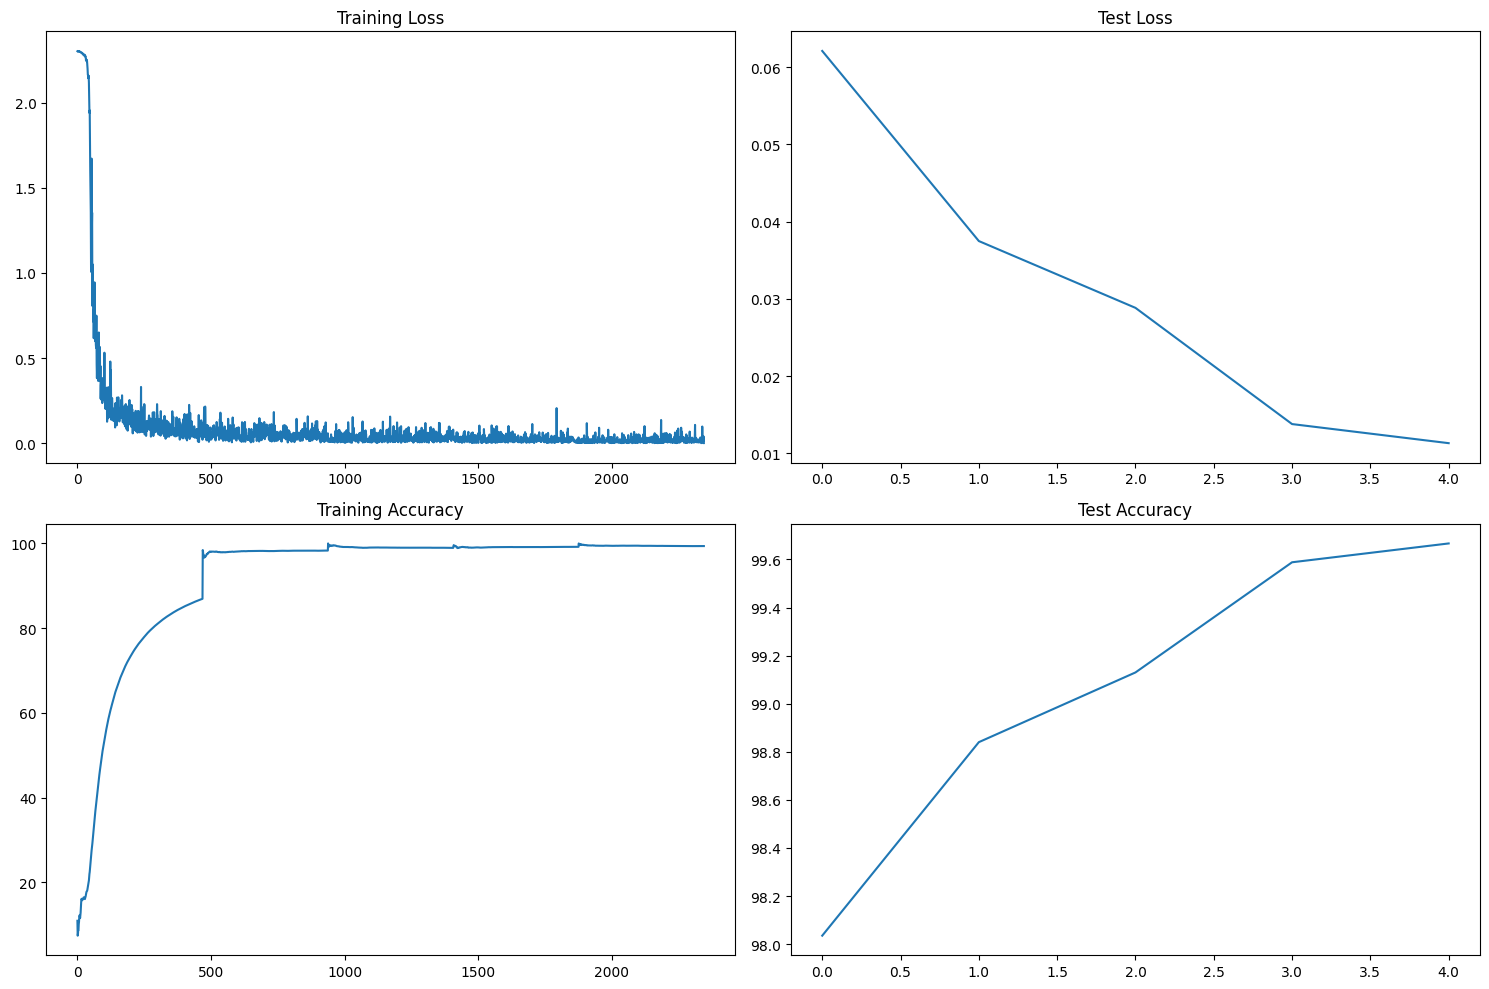

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.tight_layout()

# Show the plots
plt.show()